# Ejercicio en el que, a partir de un seudo codigo, desarrollo totalmente solo, un modelo ML
## Pasos
- Defir el problema a resolver
- Importar librerias requeridas
- Obtener el dataset para entrenar y probar el modelo
- Realizar el análisis exploratorio de los datos
- Definir si se requiere una ingenieria de atributos o variables (Feature engineering)
- Crear , entrenar y probar modelo
- Evaluar modelo
- Validación con Cross Validation

### Problema: Crear un modelo que pueda predecir valores a partir de una sola variable numérica independiente
 - Crear un data set numérico con cierto ruido que se ajuste a una distribución polinómica y verificar gráficamente
 - Probar comportamiento con un dataset de prueba
 - El método de evaluación sera MSE, R2_Score. Confirmación con Cross_Validation

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, KFold

In [73]:
X = np.random.rand(500,1)*10 # un solo atributo (Feature), 500 datapoints

In [74]:
print(X[:5])


[[8.96410367]
 [0.06735935]
 [8.63392926]
 [9.73706774]
 [6.83006651]]


In [75]:
y = 3 + 0.5*X**2 + np.random.randn(500,1)*3  #Funcion polinómica con ruido para simular no linearidad

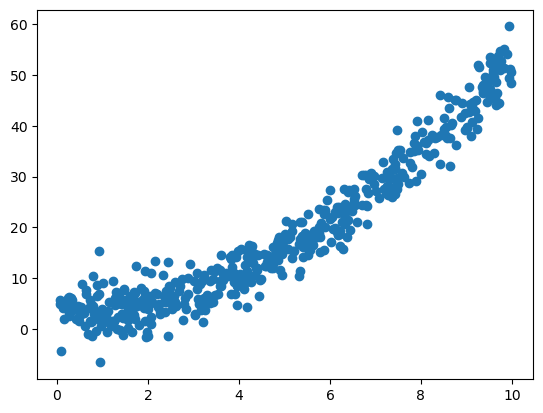

In [76]:
plt.scatter(X,y)

In [77]:
X_df = pd.DataFrame(X, columns=["feature"])

In [78]:
X_df.head()

,feature
0,8.964104
1,0.067359
2,8.633929
3,9.737068
4,6.830067


In [79]:
y_df = pd.DataFrame(y, columns=["target"])
y_df.head()
                

,target
0,39.188829
1,5.740261
2,32.163775
3,54.658576
4,26.689062


In [80]:
df=pd.concat([X_df, y_df], axis=1)

In [81]:
df.head()

,feature,target
0,8.964104,39.188829
1,0.067359,5.740261
2,8.633929,32.163775
3,9.737068,54.658576
4,6.830067,26.689062


In [82]:
df.describe()

,feature,target
count,500.000000,500.000000
mean,4.735625,18.377865
std,2.890139,15.085427
min,0.067359,-6.567530
25%,2.034049,5.738052
50%,4.604438,14.268221
75%,7.162609,28.527570
max,9.977889,59.514877


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   feature  500 non-null    float64
 1   target   500 non-null    float64
dtypes: float64(2)
memory usage: 7.9 KB


In [84]:
df.shape

(500, 2)

In [85]:
df.isnull().sum()

feature    0
target     0
dtype: int64

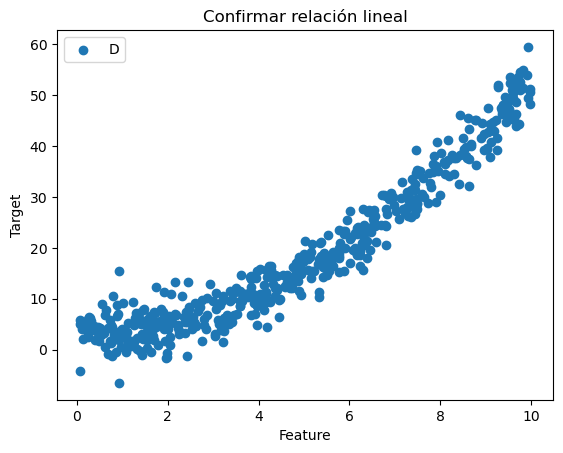

In [86]:
plt.scatter(df["feature"], df["target"])
plt.xlabel("Feature")
plt.ylabel("Target")
plt.title("Confirmar relación lineal")
plt.legend("Datapoints")

In [87]:
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Tamaño de los datos para entrenamiento (Features):  {X_train.shape}")
print(f"Tamaño de los datos para pruebas(Features):  {X_test.shape}")
print(f"Tamaño de los datos para entrenamiento (Target):  {y_train.shape}")
print(f"Tamaño de los datos para pruebas(Target):  {y_test.shape}")

Tamaño de los datos para entrenamiento (Features):  (400, 1)
Tamaño de los datos para pruebas(Features):  (100, 1)
Tamaño de los datos para entrenamiento (Target):  (400, 1)
Tamaño de los datos para pruebas(Target):  (100, 1)


### Características polinomiales: cuando se sospecha que la relación entre las variables dependientes e independientes no es lineal, las características polinomiales pueden ayudar a capturar esta no linealidad

In [88]:
# Crear un objeto PolynomialFeatures desde la libreria sklearn preprocessing
poli = PolynomialFeatures(degree = 2, include_bias=False) #Degree 2 significa la potencia a la que hay que elevar X para capturar no linealidad

# Tranformar los valores originales de X
X_train_poli = poli.fit_transform(X_train)
X_test_poli = poli.transform(X_test)

print(f"Original: {X_train.shape}")
print(f"Transformada: {X_train_poli.shape}")

Original: (400, 1)
Transformada: (400, 2)


In [89]:
print(X_train_poli[:5])

[[ 1.68702928  2.8460678 ]
 [ 0.72955726  0.5322538 ]
 [ 1.41750389  2.00931728]
 [ 7.5125371  56.43821368]
 [ 3.07529428  9.4574349 ]]


### Crear y entrenar el modelo con los valores de X transformados

In [90]:
# Crear el modelo de regression lineal
modelo = LinearRegression() # Crear objeto


In [91]:
modelo.fit(X_train_poli, y_train) # entrenar modelo

LinearRegression()

In [92]:
# Probar modelo entrenado con el set de prueba
y_pred = modelo.predict(X_test_poli)

In [93]:
y_pred.shape

(100, 1)

In [94]:
print(y_pred[:5])

[[21.9288967 ]
 [ 3.91866669]
 [ 3.18124903]
 [10.86459293]
 [29.09724445]]


In [95]:
print(X_test_poli[:5])

[[ 6.15120938 37.83737685]
 [ 1.27570008  1.6274107 ]
 [ 0.2835479   0.08039941]
 [ 3.95694947 15.65744914]
 [ 7.22349833 52.17892814]]


Text(0.5, 1.0, 'Datos reales vs Predicciones')

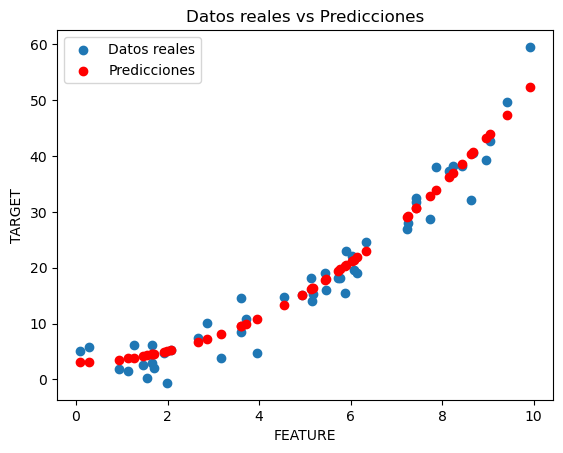

In [96]:
plt.scatter(X_test[:50], y_test[:50], label="Datos reales")
plt.scatter(X_test[:50], y_pred[:50], color="red", label="Predicciones")
plt.legend()
plt.xlabel("FEATURE")
plt.ylabel("TARGET")
plt.title("Datos reales vs Predicciones")


In [97]:
print(f"coeficientes : {modelo.coef_}")
print(f"intercept : {modelo.intercept_}")

coeficientes : [[-0.04087472  0.50288683]]
intercept : [3.15240717]


In [98]:
z= 2.78505141 - 0.09686853*6.53389944 + 0.51436562*42.69184185 #Funcion polinómica a partir de coeficientes

In [99]:
z #confirmar predicion a partir de aplicacion de funcion polinomica

24.111337878196576

In [100]:
y_pred_1 = modelo.predict([[1.9, 3.61]])

In [101]:
y_pred_1

array([[4.89016666]])

In [102]:
y_pred.shape

(100, 1)

### Evaluar el modelo con MSE y R2_Score

In [103]:
mse = mean_squared_error(y_test, y_pred) # Mide que tan lejos estan las predicciones de los valores reales (Menos es mejor). Se usa para comparar dos modelos
r2 = r2_score(y_test, y_pred) # Que tan bien el modelo explica la variación en los datos(Mas cercano a 1 es mejor).

print(f"MSE : {mse:.2f}")
print(f"R2_score : {r2:.2f}")

MSE : 9.20
R2_score : 0.96


# MSE:7.42 y R2: 0.96 con grado 2, MSE:7.47 y R2: 0.96 con grado 3
### Comparando MSE grado 2 con MSE grado 3 se concluye que es suficiente o mejor utilizar grado 2 en el modelo
- https://vitalflux-com.translate.goog/mean-square-error-r-squared-which-one-to-use/?_x_tr_sl=en&_x_tr_tl=es&_x_tr_hl=es&_x_tr_pto=wa

# Cross validation


In [104]:
k = 5 
kf = KFold(n_splits=k, shuffle=True, random_state=42)
scores = cross_val_score(modelo, X_train_poli, y_train, cv=kf, scoring='r2')
print(f'Cross validation scores para cada grupo (k): {scores}') # Nos da la valoración en cada subset de los datos
print(f'R² Score promedio : {scores.mean():.2f}')
                         

Cross validation scores para cada grupo (k): [0.96134419 0.96036007 0.95170933 0.95166863 0.9620756 ]
R² Score promedio : 0.96


In [ ]:
import pickle
filename = 'modelo_simple_polinomial_regresion.pkl'
pickle.dump(modelo, open(filename, 'wb'))


# Conclusiones
1. Se ha visualizado que la transformación de variables independientes (features) a variables polinomiales ayuda a obtener predicciones mas acertadas.
2. El uso de variables polinomiales de grado 2 es suficiente para resultados aceptables. Se obtuvo R2=0.96, es decir una excelente fiabilidad para las previsiones futuras. Es decir, en el 96% de los casos la variación de la variable dependiente es correctamente explicada por la variación de las variables independientes.
3. Finalmente, se confirma lo aseverado al validar el modelo con 5 (k=5) grupos diferentes de datos de entrenamiento y pruebas.